<a href="https://colab.research.google.com/github/alyssapalms/Assignment13/blob/main/Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow numpy pandas requests

import numpy as np
import pandas as pd
import requests
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

Dataset Prep - project Gutenberg
Alice in Wonderland

In [2]:
url = "https://www.gutenberg.org/cache/epub/11/pg11.txt"
response = requests.get(url)

text = response.text.lower()
print("Characters in dataset:", len(text))

# Preview the text
print(text[:600])

Characters in dataset: 167674
﻿the project gutenberg ebook of alice's adventures in wonderland
    
this ebook is for the use of anyone anywhere in the united states and
most other parts of the world at no cost and with almost no restrictions
whatsoever. you may copy it, give it away or re-use it under the terms
of the project gutenberg license included with this ebook or online
at www.gutenberg.org. if you are not located in the united states,
you will have to check the laws of the country where you are located
before using this ebook.

title: alice's adventures in wonderland

author: lewis carroll

release 


Tokenization

In [3]:
words = text.split()
print("Number of words:", len(words))

# Create vocabulary
vocab = sorted(set(words))
word_index = {word: i+1 for i, word in enumerate(vocab)}  # start at 1
index_word = {i+1: word for i, word in enumerate(vocab)}

vocab_size = len(vocab)
print("Vocabulary size:", vocab_size)

Number of words: 29564
Vocabulary size: 5641


Sequence creation

In [4]:
# convert text to integer sequence
encoded = [word_index[word] for word in words]

# prepare training sequences
sequences = []
seq_length = 5  # small for speed

for i in range(seq_length, len(encoded)):
    seq = encoded[i-seq_length:i+1]
    sequences.append(seq)

sequences = np.array(sequences)
print("Training sequences:", sequences.shape)

X = sequences[:, :-1]
y = sequences[:, -1]

# encode labels
y = to_categorical(y, num_classes=vocab_size)

Training sequences: (29559, 6)


LSTM generation model

In [8]:
model = Sequential()
model.add(Embedding(vocab_size + 1, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(vocab_size, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model

In [9]:
history = model.fit(X, y, epochs=3, batch_size=256)

Epoch 1/3
116/116 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.0541 - loss: 8.0630
Epoch 2/3
116/116 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.0616 - loss: 6.7455
Epoch 3/3
116/116 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.0597 - loss: 6.6448


Text generation function

In [11]:
def generate_text(seed_text, num_words=30):
    words_list = seed_text.lower().split()

    for _ in range(num_words):
        encoded_seq = [word_index.get(w, 1) for w in words_list[-seq_length:]]
        padded = pad_sequences([encoded_seq], maxlen=seq_length)
        prediction = model.predict(padded, verbose=0)

        next_index = np.argmax(prediction)
        next_word = index_word.get(next_index, "")

        words_list.append(next_word)

    return " ".join(words_list)

Application demonstration

In [12]:
seed = "alice was walking through"
print("Generated text:")
print(generate_text(seed, num_words=40))

Generated text:
alice was walking through the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the


plot

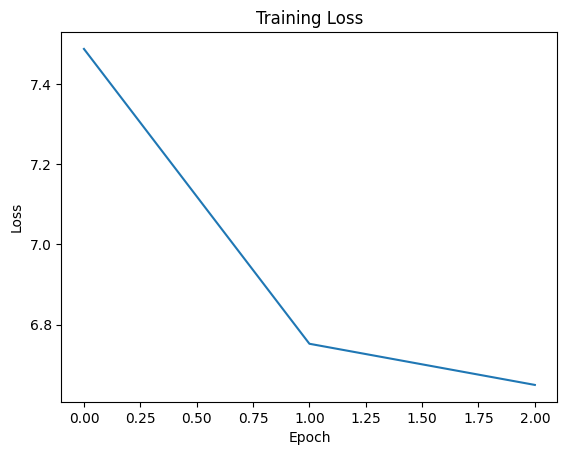

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()